In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, geom_line, aes, labs, theme_minimal, geom_boxplot, coord_flip
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [54]:
df = pd.read_csv('model_data.csv')
df['WINNER_cat'] = df['WINNER'].astype('category')
df.columns

Index(['Unnamed: 0', 'GAME_ID', 'TEAM_NAME', 'PTS', 'WINNER',
       'DEFLECTIONS_RATIO', 'DEFLECTIONS_DIFF', 'CONTEST_RATE',
       'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_RATIO', 'CHARGES_DIFF',
       'SCREEN_AST_RATIO', 'SCREEN_AST_DIFF', 'SCREEN_AST_PTS_RATIO',
       'SCREEN_AST_PTS_DIFF', 'LOOSE_RATIO', 'LOOSE_DIFFERENCE',
       'OFF_BOXOUT_RATIO', 'OFF_BOXOUT_DIFF', 'DEF_BOXOUT_RATIO',
       'DEF_BOXOUT_DIFF', 'BOXOUT_TM_RBS_RATIO', 'BOXOUT_TM_RBS_DIFF',
       'WINNER_cat'],
      dtype='object')

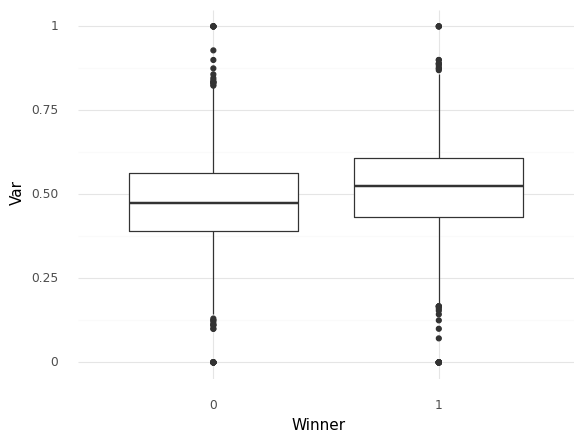

<ggplot: (8770277479885)>

In [55]:
(ggplot(df, aes('WINNER_cat', 'BOXOUT_TM_RBS_RATIO'))
 + geom_boxplot() + 
labs(x = "Winner", y = "Var") + 
theme_minimal())

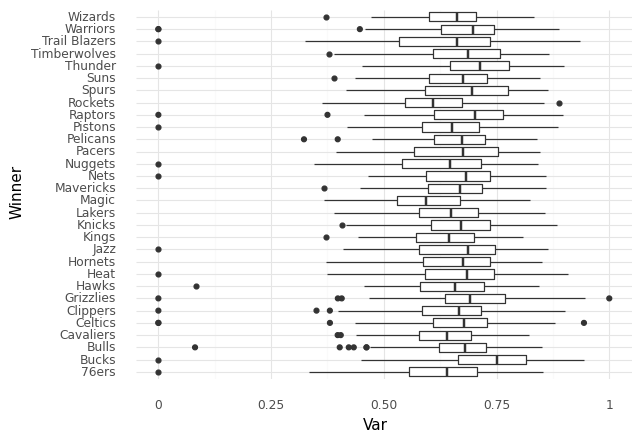

<ggplot: (8770276893793)>

In [56]:
(ggplot(df, aes('TEAM_NAME', 'CONTEST_RATE'))
 + geom_boxplot() + 
labs(x = "Winner", y = "Var") + 
theme_minimal() + 
coord_flip())

In [60]:
y = df['WINNER'].values
X = df[['DEFLECTIONS_RATIO', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_RATIO', 'SCREEN_AST_RATIO', 'SCREEN_AST_PTS_RATIO', 'LOOSE_RATIO', 'OFF_BOXOUT_RATIO', 'DEF_BOXOUT_RATIO', 'BOXOUT_TM_RBS_RATIO']].values

In [59]:
df.columns

Index(['Unnamed: 0', 'GAME_ID', 'TEAM_NAME', 'PTS', 'WINNER',
       'DEFLECTIONS_RATIO', 'DEFLECTIONS_DIFF', 'CONTEST_RATE',
       'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_RATIO', 'CHARGES_DIFF',
       'SCREEN_AST_RATIO', 'SCREEN_AST_DIFF', 'SCREEN_AST_PTS_RATIO',
       'SCREEN_AST_PTS_DIFF', 'LOOSE_RATIO', 'LOOSE_DIFFERENCE',
       'OFF_BOXOUT_RATIO', 'OFF_BOXOUT_DIFF', 'DEF_BOXOUT_RATIO',
       'DEF_BOXOUT_DIFF', 'BOXOUT_TM_RBS_RATIO', 'BOXOUT_TM_RBS_DIFF',
       'WINNER_cat'],
      dtype='object')

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=858, test_size=.3)

In [62]:
lr = LogisticRegression(solver='liblinear', C=1)
lr.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
y_hat_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:,1]

In [65]:
confusion_matrix(y_test, y_hat_lr)

array([[440, 253],
       [279, 414]])

In [66]:
accuracy_score(y_test, y_hat_lr)

0.6161616161616161

In [67]:
roc_auc_score(y_test, y_prob_lr)

0.6538358226669916

In [68]:
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_prob_lr)

In [70]:
X_diff = df[['DEFLECTIONS_DIFF', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_DIFF', 'SCREEN_AST_DIFF', 'SCREEN_AST_PTS_DIFF', 'LOOSE_DIFFERENCE', 'OFF_BOXOUT_DIFF', 'DEF_BOXOUT_DIFF', 'BOXOUT_TM_RBS_DIFF']].values

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_diff, y, stratify=y, random_state=858, test_size=.3)

In [72]:
lr = LogisticRegression(solver='liblinear', C=1)
lr.fit(X_train, y_train)
y_hat_lr_diff = lr.predict(X_test)
y_prob_lr_diff = lr.predict_proba(X_test)[:,1]

In [73]:
confusion_matrix(y_test, y_hat_lr_diff)

array([[449, 244],
       [276, 417]])

In [74]:
accuracy_score(y_test, y_hat_lr_diff)

0.6248196248196248

In [75]:
roc_auc_score(y_test, y_prob_lr_diff)

0.6746770945905145

In [76]:
fpr_lr_diff, tpr_lr_diff, thresh = roc_curve(y_test, y_prob_lr_diff)

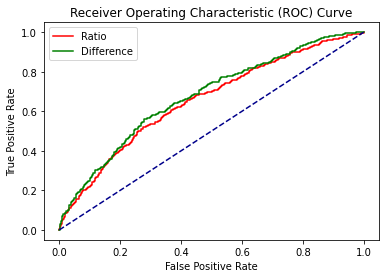

In [78]:
plt.plot(fpr_lr, tpr_lr, color='red',label='Ratio')
plt.plot(fpr_lr_diff, tpr_lr_diff, color = 'green', label = "Difference")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)